## Load and Inspect Raw Data



In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the raw dataset
df = pd.read_csv("spotify_top_1000_tracks.csv")


## Remove duplicates

In [24]:
## Remove duplicates based on the unique track ID
df = df.drop_duplicates(subset="id")
print(f" Dataset after removing duplicates: {df.shape[0]} rows")


 Dataset after removing duplicates: 1000 rows


## Convert release date to datetime



In [26]:
# Convert release_date column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], format="%d/%m/%Y", errors='coerce')

# Check for nulls caused by invalid formats
missing_dates = df['release_date'].isna().sum()
print(f" Missing or invalid release dates: {missing_dates}")


 Missing or invalid release dates: 23


## Drop outliers in duration

In [28]:
# Define outlier thresholds using 1st and 99th percentiles
q1 = df['duration_min'].quantile(0.01)
q99 = df['duration_min'].quantile(0.99)

# Filter duration between these thresholds
df = df[(df['duration_min'] >= q1) & (df['duration_min'] <= q99)]

print(f" Dataset after removing duration outliers: {df.shape[0]} rows")


 Dataset after removing duration outliers: 980 rows


## Final check on clean csv

In [31]:
# Reset index
df.reset_index(drop=True, inplace=True)

# Final summary of missing values
print("🧼 Missing values per column:")
print(df.isnull().sum())

# Save the cleaned file
df.to_csv("spotify_top_1000_tracks_cleaned.csv", index=False)
print("Cleaned data saved as: spotify_top_1000_tracks_cleaned.csv")



🧼 Missing values per column:
track_name       0
artist           0
album            0
release_date    23
popularity       0
spotify_url      0
id               0
duration_min     0
dtype: int64
Cleaned data saved as: spotify_top_1000_tracks_cleaned.csv


## Basic inspections

In [34]:
df.head() # This will display the first 5 rows

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.869767
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.840883
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.182667
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ew...,3USxtqRwSYz57Ewm6wWRMp,3.980083
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZ...,0lYBSQXN6rCTvUZvg9S0lU,3.432433


In [36]:
df.tail() # This will display the last five rows

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min
975,Lily,ISAEV,Lily,2023-02-24,0,https://open.spotify.com/track/4tVhDkvh6N4lrTy...,4tVhDkvh6N4lrTyNeZHYuz,2.572100
976,Apologize,Besomorph,Apologize,2020-05-08,5,https://open.spotify.com/track/0Uo43DNldd7aNxi...,0Uo43DNldd7aNxizhKgowg,2.443350
977,I’m Good,Yohan Gerber,I’m Good,2023-05-19,0,https://open.spotify.com/track/2aZL4EjY5aPKWTO...,2aZL4EjY5aPKWTO7RKuWiy,2.376000
978,Down,Arc North,Down,2020-07-02,1,https://open.spotify.com/track/6nQZG4G0vIrQWaC...,6nQZG4G0vIrQWaCGbqHCQn,2.391667
979,Chandelier,Besomage,Chandelier,2023-01-04,0,https://open.spotify.com/track/1Ea8I3MoGx36FfA...,1Ea8I3MoGx36FfAmrjzo1r,2.295650


In [40]:
df.shape # This will check the number of rows and columns

(980, 8)

In [42]:
df.info() # This will get the data types, column names and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   track_name    980 non-null    object        
 1   artist        980 non-null    object        
 2   album         980 non-null    object        
 3   release_date  957 non-null    datetime64[ns]
 4   popularity    980 non-null    int64         
 5   spotify_url   980 non-null    object        
 6   id            980 non-null    object        
 7   duration_min  980 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 61.4+ KB


In [44]:
df.describe() # This will return the summary statistic for numerical columns 

,release_date,popularity,duration_min
count,957,980.000000,980.000000
mean,2017-12-17 13:52:06.018808832,56.766327,3.296674
min,1981-01-01 00:00:00,0.000000,1.696483
25%,2014-09-02 00:00:00,37.000000,2.775529
50%,2018-11-30 00:00:00,68.000000,3.293833
75%,2022-07-15 00:00:00,79.000000,3.725442
max,2025-04-11 00:00:00,97.000000,6.017067
std,NaN,28.179628,0.723416


In [46]:
df.columns # This will list all column names

Index(['track_name', 'artist', 'album', 'release_date', 'popularity',
       'spotify_url', 'id', 'duration_min'],
      dtype='object')

## <span style='color: magenta;' > EXPLANATORY DATA ANALYSIS </span>

## <span style='color: skyblue;'> POPULARITY INSIGHTS </span>

## <span style= 'color: skyblue;'>Top 10 most popular tracks and their Artist </span>

In [52]:
# Top 10 most popular tracks
top_10_popular = df.sort_values(by="popularity", ascending=False).head(10)

# Display relevant columns
top_10_popular[["track_name", "artist", "popularity"]]


,track_name,artist,popularity
603,That’s So True,Gracie Abrams,97
599,APT.,ROSÉ,96
0,All The Stars (with SZA),Kendrick Lamar,95
478,I Wanna Be Yours,Arctic Monkeys,93
755,"One Of The Girls (with JENNIE, Lily Rose Depp)",The Weeknd,93
80,Yellow,Coldplay,92
727,Show Me Love,WizTheMc,92
619,Sweater Weather,The Neighbourhood,92
607,blue,yung kai,92
550,End of Beginning,Djo,90


## <span style='color:red;'> Distribution of Popularity Scores </span>


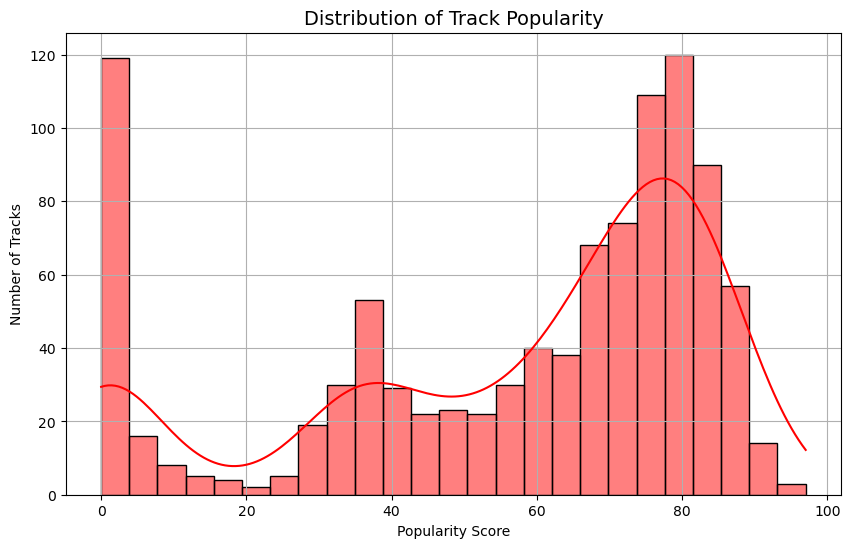

In [63]:

# Histogram of popularity scores
plt.figure(figsize=(10,6))
sns.histplot(df["popularity"], bins=25, kde=True, color='red')
plt.title("Distribution of Track Popularity", fontsize=14)
plt.xlabel("Popularity Score")
plt.ylabel("Number of Tracks")
plt.grid(True)
plt.show()


## <span style= 'color: darkblue;'> Correlation Between Popularity and Duration </span>



📈 Correlation between popularity and duration: 0.256


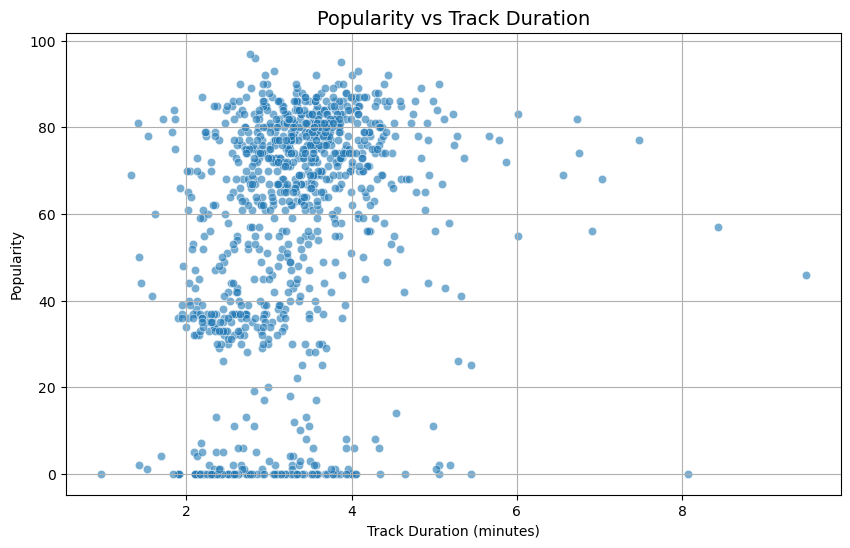

In [66]:
# Correlation coefficient
correlation = df[["popularity", "duration_min"]].corr().iloc[0, 1]
print(f"📈 Correlation between popularity and duration: {correlation:.3f}")

# Scatterplot to visualize the relationship
plt.figure(figsize=(10,6))
sns.scatterplot(x="duration_min", y="popularity", data=df, alpha=0.6)
plt.title("Popularity vs Track Duration", fontsize=14)
plt.xlabel("Track Duration (minutes)")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()


## <span style= ' color: magenta;'> ARTISTS INSIGHTS </span>

## <span style= 'color: skyblue;'> Top artist by number of tracks  </span>

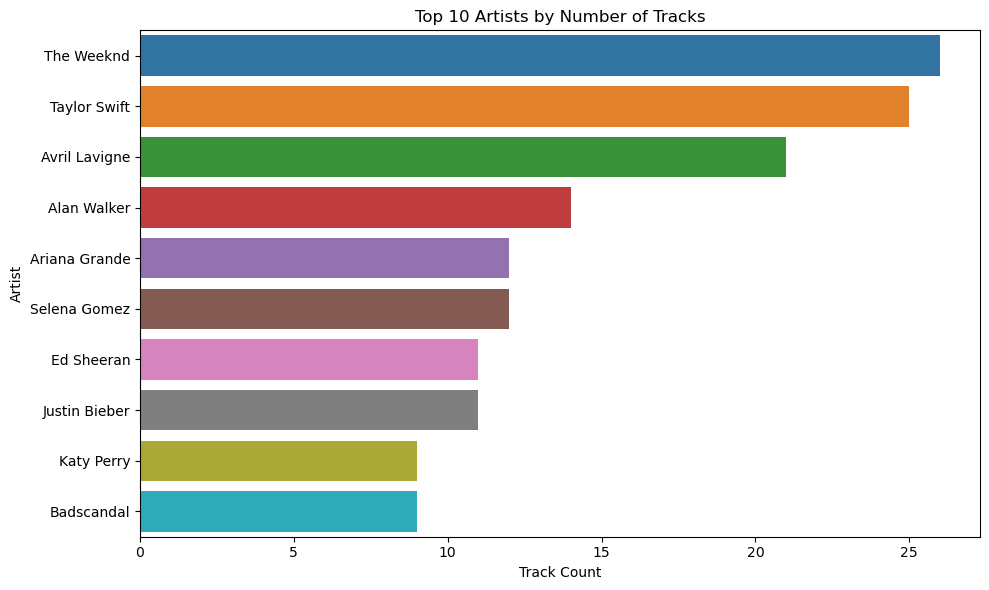

artist
The Weeknd       26
Taylor Swift     25
Avril Lavigne    21
Alan Walker      14
Ariana Grande    12
Selena Gomez     12
Ed Sheeran       11
Justin Bieber    11
Katy Perry        9
Badscandal        9
Name: count, dtype: int64

In [89]:
# Count how many times each artist appears
artist_counts = df['artist'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette="tab10")
plt.title("Top 10 Artists by Number of Tracks")
plt.xlabel("Track Count")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()


# Display top artists
artist_counts

## <span style = 'color:skyblue;'> Average Popularity per Artist (Top 10 by Popularity) </span> 


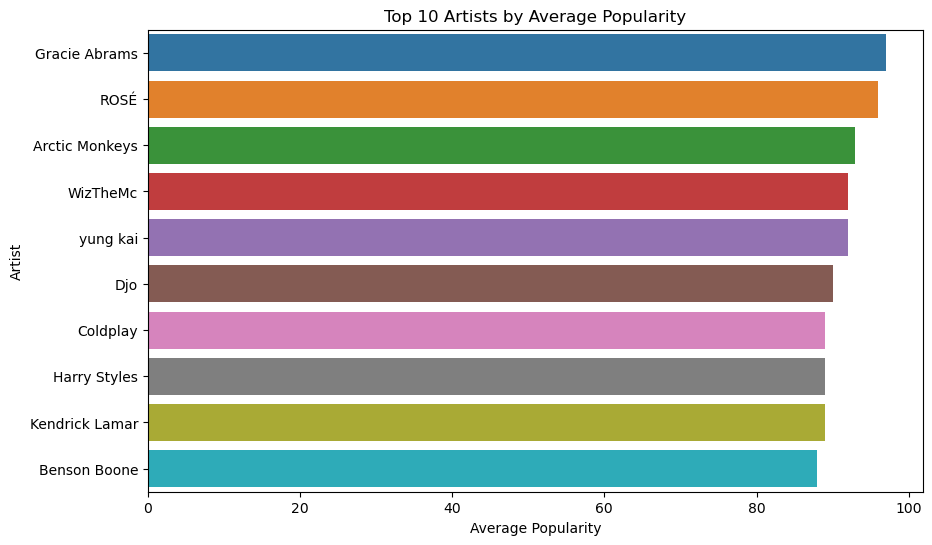

artist
Gracie Abrams     97.0
ROSÉ              96.0
Arctic Monkeys    93.0
WizTheMc          92.0
yung kai          92.0
Djo               90.0
Coldplay          89.0
Harry Styles      89.0
Kendrick Lamar    89.0
Benson Boone      88.0
Name: popularity, dtype: float64

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 artists by average popularity
top_artists = df.groupby('artist')['popularity'].mean().nlargest(10)

# Create plot with different colors for each bar
plt.figure(figsize=(10,6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='tab10')

# Add simple labels and title
plt.title("Top 10 Artists by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Artist")

plt.show()

# Display the values
top_artists



## <span style= 'color: brown;'>Artists with Longest Average Track Duration (Top 10)</span>

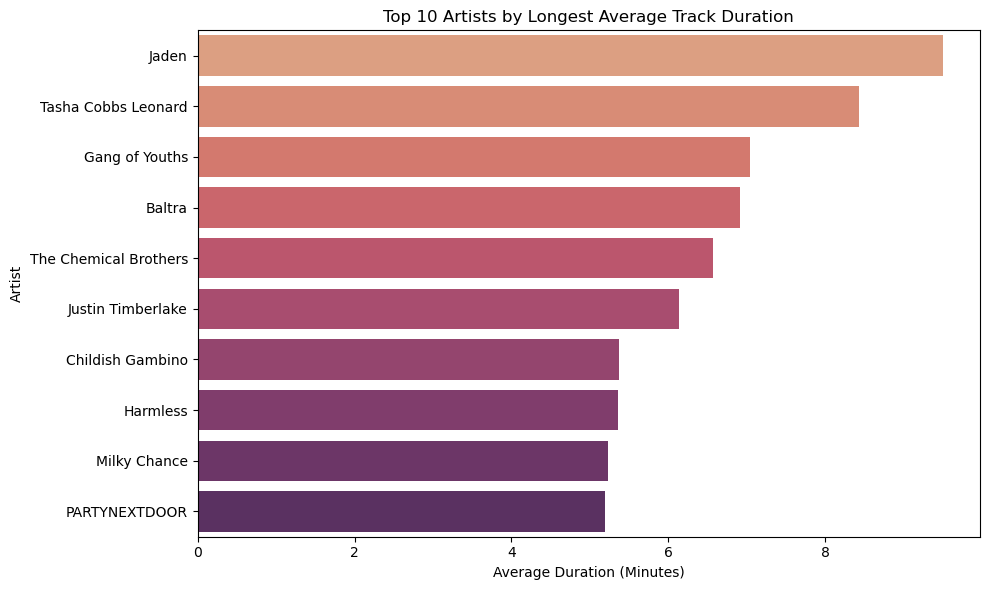

artist
Jaden                    9.497883
Tasha Cobbs Leonard      8.436667
Gang of Youths           7.035767
Baltra                   6.909833
The Chemical Brothers    6.563550
Justin Timberlake        6.141771
Childish Gambino         5.368550
Harmless                 5.357300
Milky Chance             5.228067
PARTYNEXTDOOR            5.186617
Name: duration_min, dtype: float64

In [107]:
# Group by artist and calculate average duration
avg_duration = df.groupby('artist')['duration_min'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_duration.values, y=avg_duration.index, palette="flare")
plt.title("Top 10 Artists by Longest Average Track Duration")
plt.xlabel("Average Duration (Minutes)")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

# Display values
avg_duration


## <span style='color:gold;'> Tracks Released Per Year (Line Chart)</span>


## number of tracks released by year

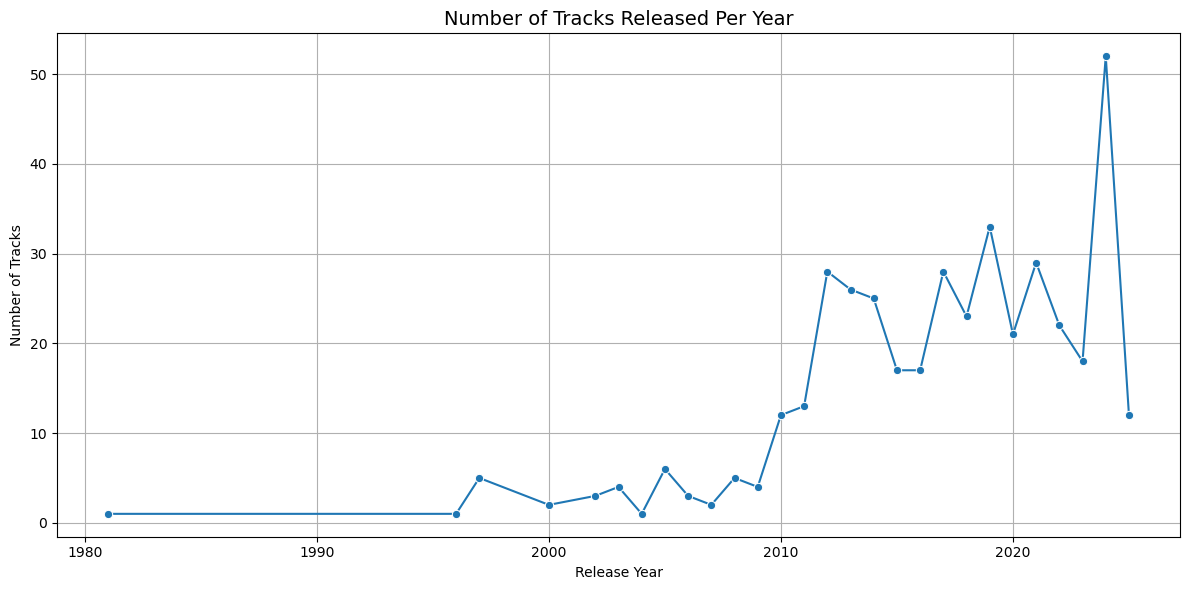

release_year
1981.0     1
1996.0     1
1997.0     5
2000.0     2
2002.0     3
2003.0     4
2004.0     1
2005.0     6
2006.0     3
2007.0     2
2008.0     5
2009.0     4
2010.0    12
2011.0    13
2012.0    28
2013.0    26
2014.0    25
2015.0    17
2016.0    17
2017.0    28
2018.0    23
2019.0    33
2020.0    21
2021.0    29
2022.0    22
2023.0    18
2024.0    52
2025.0    12
Name: count, dtype: int64

In [123]:
# Ensure release_date is datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract year and month
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month_name()

# Tracks Released Per Year
tracks_by_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=tracks_by_year.index, y=tracks_by_year.values, marker='o')
plt.title("Number of Tracks Released Per Year", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Number of Tracks")
plt.grid(True)
plt.tight_layout()
plt.show()

tracks_by_year

## Average popularity over year

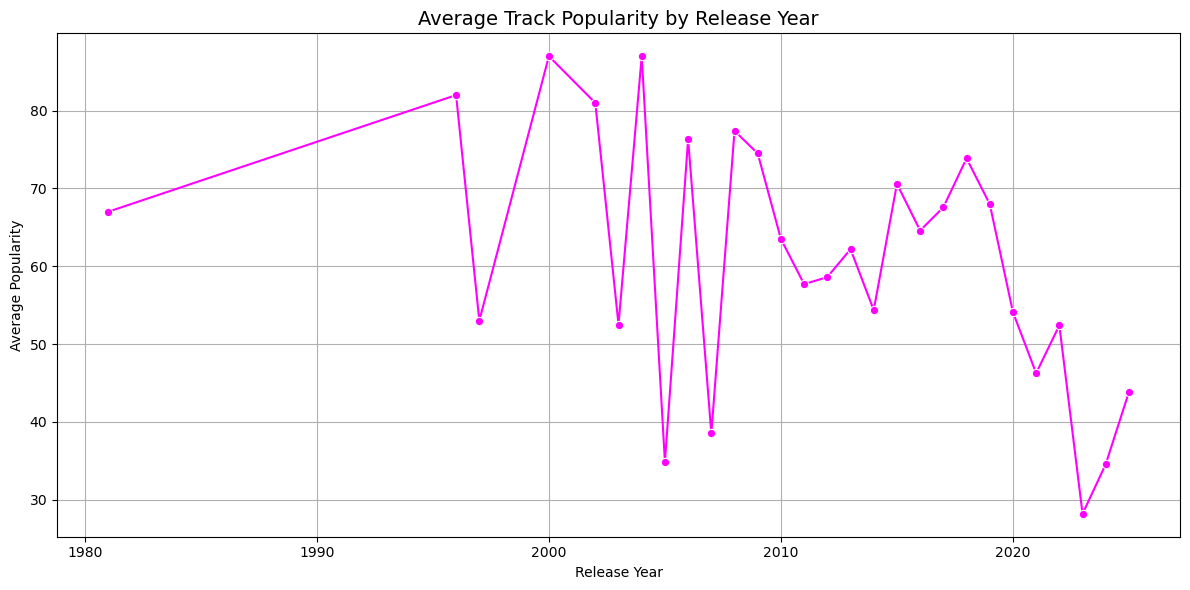

release_year
1981.0    67.000000
1996.0    82.000000
1997.0    53.000000
2000.0    87.000000
2002.0    81.000000
2003.0    52.500000
2004.0    87.000000
2005.0    34.833333
2006.0    76.333333
2007.0    38.500000
2008.0    77.400000
2009.0    74.500000
2010.0    63.500000
2011.0    57.692308
2012.0    58.607143
2013.0    62.192308
2014.0    54.360000
2015.0    70.588235
2016.0    64.588235
2017.0    67.571429
2018.0    73.869565
2019.0    68.000000
2020.0    54.095238
2021.0    46.241379
2022.0    52.409091
2023.0    28.166667
2024.0    34.557692
2025.0    43.833333
Name: popularity, dtype: float64

In [128]:
# 📈 Cell 2: Average Popularity Per Year
avg_pop_by_year = df.groupby('release_year')['popularity'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=avg_pop_by_year.index, y=avg_pop_by_year.values, marker='o', color='magenta')
plt.title("Average Track Popularity by Release Year", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.grid(True)
plt.tight_layout()
plt.show()

avg_pop_by_year


In [141]:
pd.read_csv("spotify_top_1000_tracks_cleaned.csv")

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.869767
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.840883
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.182667
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ew...,3USxtqRwSYz57Ewm6wWRMp,3.980083
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZ...,0lYBSQXN6rCTvUZvg9S0lU,3.432433
...,...,...,...,...,...,...,...,...
975,Lily,ISAEV,Lily,2023-02-24,0,https://open.spotify.com/track/4tVhDkvh6N4lrTy...,4tVhDkvh6N4lrTyNeZHYuz,2.572100
976,Apologize,Besomorph,Apologize,2020-05-08,5,https://open.spotify.com/track/0Uo43DNldd7aNxi...,0Uo43DNldd7aNxizhKgowg,2.443350
977,I’m Good,Yohan Gerber,I’m Good,2023-05-19,0,https://open.spotify.com/track/2aZL4EjY5aPKWTO...,2aZL4EjY5aPKWTO7RKuWiy,2.376000
978,Down,Arc North,Down,2020-07-02,1,https://open.spotify.com/track/6nQZG4G0vIrQWaC...,6nQZG4G0vIrQWaCGbqHCQn,2.391667


## <span style= 'color:brown;'> Tracks duration</span>


In [152]:
# Convert release_date to datetime (if not already)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Basic track duration stats
print("📊 Track Duration Statistics:")
print(f"Min Duration: {df['duration_min'].min():.2f} minutes")
print(f"Max Duration: {df['duration_min'].max():.2f} minutes")
print(f"Mean Duration: {df['duration_min'].mean():.2f} minutes")
print(f"Median Duration: {df['duration_min'].median():.2f} minutes")
print(f"Std Deviation: {df['duration_min'].std():.2f} minutes")


📊 Track Duration Statistics:
Min Duration: 0.97 minutes
Max Duration: 7.48 minutes
Mean Duration: 3.30 minutes
Median Duration: 3.37 minutes
Std Deviation: 0.74 minutes


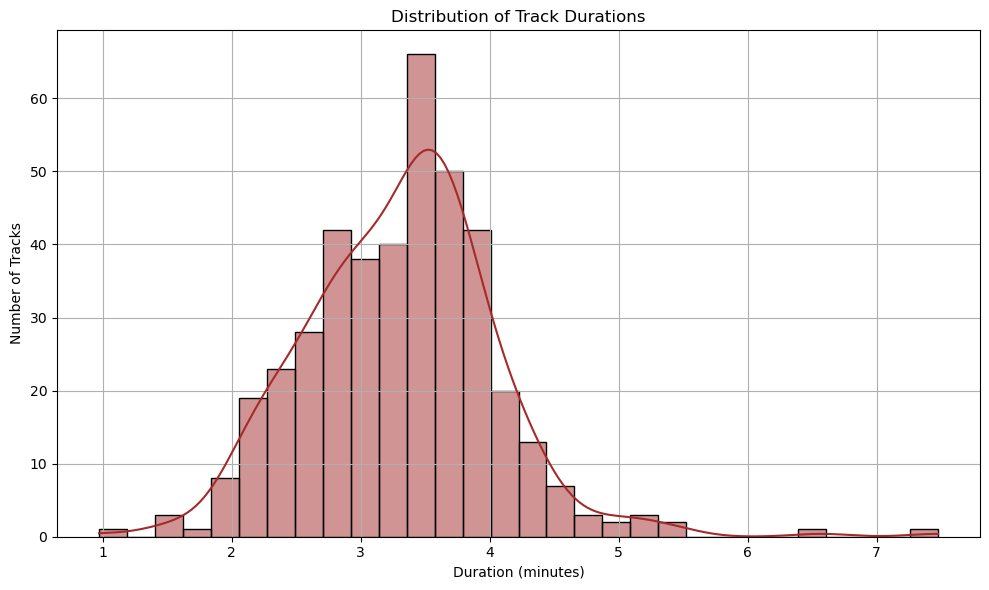

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['duration_min'], bins=30, kde=True, color='brown')
plt.title("Distribution of Track Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Tracks")
plt.grid(True)
plt.tight_layout()
plt.show()


## Boxplot of tracks duration

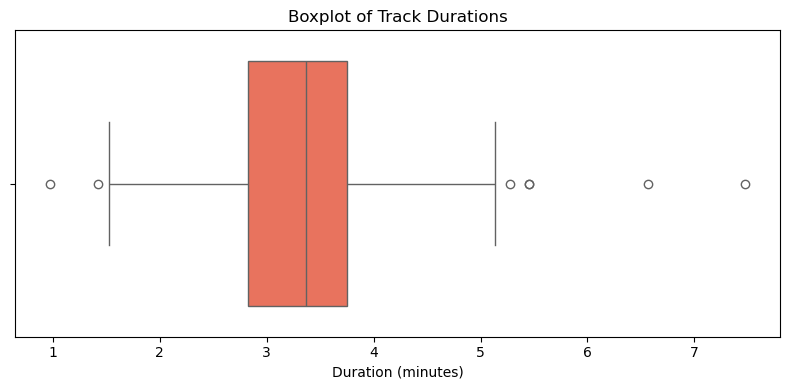

In [157]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration_min'], color='tomato')
plt.title("Boxplot of Track Durations")
plt.xlabel("Duration (minutes)")
plt.tight_layout()
plt.show()


## <span style='color: green;'> Top 10 longest and shortestr tracks</span>

In [160]:
# Longest
longest = df.sort_values(by='duration_min', ascending=False).head(10)
print("🎵 Top 10 Longest Tracks:")
display(longest[['track_name', 'artist', 'duration_min']])

# Shortest
shortest = df.sort_values(by='duration_min', ascending=True).head(10)
print("\n🎶 Top 10 Shortest Tracks:")
display(shortest[['track_name', 'artist', 'duration_min']])


🎵 Top 10 Longest Tracks:


,track_name,artist,duration_min
63,What Goes Around.../...Comes Around (Interlude),Justin Timberlake,7.476217
671,Galvanize,The Chemical Brothers,6.563550
72,My Humps,Black Eyed Peas,5.449333
736,Redbone,Childish Gambino,5.448883
446,Love Story,Indila,5.271333
653,Infinity,Infinity Ink,5.133500
289,A Thousand Years (feat. Steve Kazee) - Pt. 2; ...,Christina Perri,5.098217
106,Lighters,Bad Meets Evil,5.063550
798,Novacane,Frank Ocean,5.039100
6,Apocalypse,Cigarettes After Sex,4.843600



🎶 Top 10 Shortest Tracks:


,track_name,artist,duration_min
227,Bezos I,Bo Burnham,0.969150
728,nuts,Lil Peep,1.422667
691,SUICIDE YEAR,WEEDMANE,1.528850
734,Formula,Labrinth,1.531150
402,Walls Could Talk,Halsey,1.696483
973,Chemical,PACANI,1.843467
956,Meltdown,PACANI,1.895650
910,2AM,5lowers,1.904750
876,Mad World,54GODART,1.946417
953,Greedy,TEZIS,1.954000


## Album level analysis

## <span style= 'color: indigo;'> Album with the most top tracks</span>

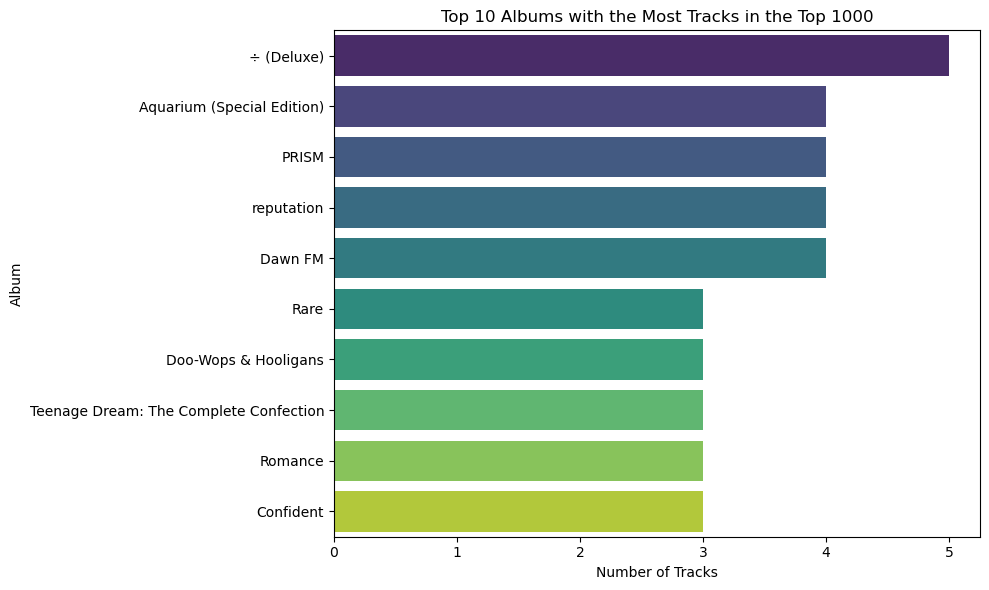

album
÷ (Deluxe)                                5
Aquarium (Special Edition)                4
PRISM                                     4
reputation                                4
Dawn FM                                   4
Rare                                      3
Doo-Wops & Hooligans                      3
Teenage Dream: The Complete Confection    3
Romance                                   3
Confident                                 3
Name: count, dtype: int64

In [166]:
# Count albums by number of tracks
top_albums = df['album'].value_counts().head(10)

# Bar chart of albums with most tracks
plt.figure(figsize=(10, 6))
sns.barplot(y=top_albums.index, x=top_albums.values, palette='viridis')
plt.title("Top 10 Albums with the Most Tracks in the Top 1000")
plt.xlabel("Number of Tracks")
plt.ylabel("Album")
plt.tight_layout()
plt.show()

# Display the values
top_albums


## Aveerage popularity by album

In [169]:
# Average popularity per album ( This only include albums with at least 2 tracks)
album_popularity = df.groupby('album').agg(
    avg_popularity=('popularity', 'mean'),
    track_count=('track_name', 'count')
)

# Filter for albums with more than one track
popular_albums = album_popularity[album_popularity['track_count'] > 1]
top_avg_popular_albums = popular_albums.sort_values(by='avg_popularity', ascending=False).head(10)

# Display top albums by average popularity
top_avg_popular_albums


,avg_popularity,track_count
album,,
T R A P S O U L,84.0,2
Doo-Wops & Hooligans,84.0,3
Encore,83.0,2
"thank u, next",82.5,2
Bangerz (Deluxe Version),82.5,2
Let Go,82.5,2
1000 Forms Of Fear,82.0,2
Born To Die - The Paradise Edition,82.0,2
Camila,82.0,2


## Average popularity for top album


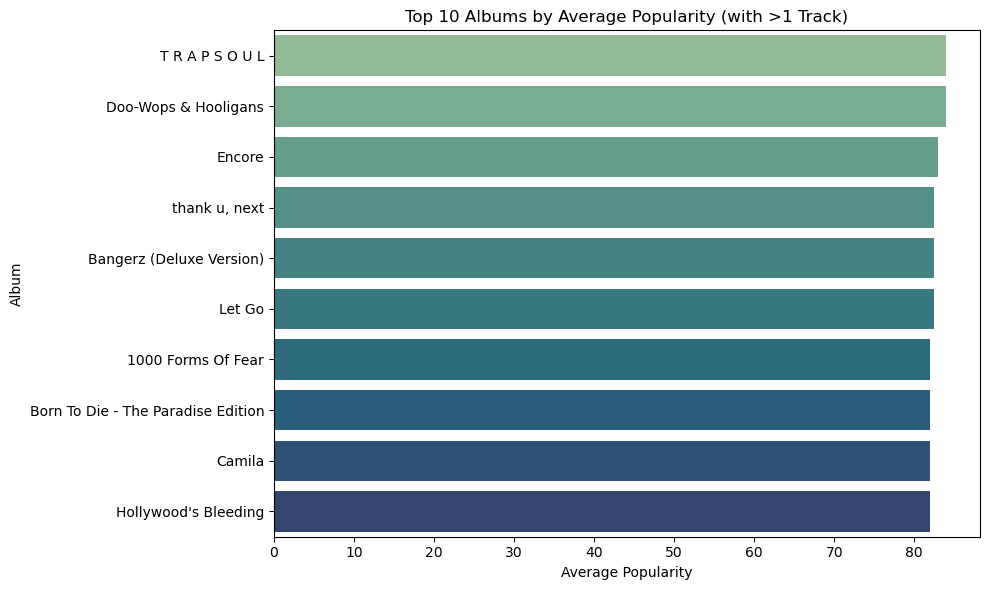

In [176]:
# Plot average popularity
plt.figure(figsize=(10, 6))
sns.barplot(data=top_avg_popular_albums.reset_index(),
            y='album', x='avg_popularity', palette='crest')
plt.title("Top 10 Albums by Average Popularity (with >1 Track)")
plt.xlabel("Average Popularity")
plt.ylabel("Album")
plt.tight_layout()
plt.show()


## Sentiment analysis on tracks titles

In [179]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


## <span style='color:magenta;'> Importing VADER and analyze sentiment </span>

In [182]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis to track titles
df['sentiment_score'] = df['track_name'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify based on compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)


## <span style='color:magenta;'> Sentiment distribution</span>

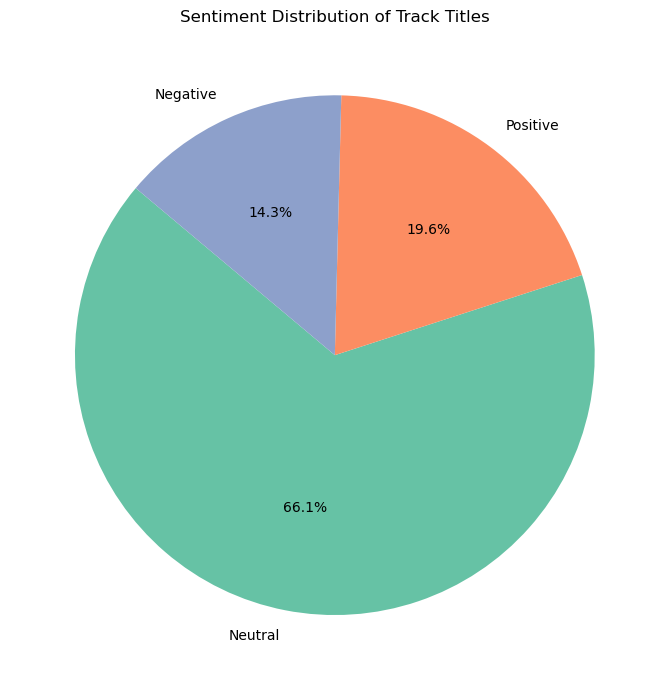

sentiment_label
Neutral     273
Positive     81
Negative     59
Name: count, dtype: int64

In [186]:
# Count of sentiment categories
sentiment_counts = df['sentiment_label'].value_counts()

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Sentiment Distribution of Track Titles")
plt.tight_layout()
plt.show()

# Show raw numbers
sentiment_counts


## <span style='color:gold;'> Average polarity by sentiment</span>

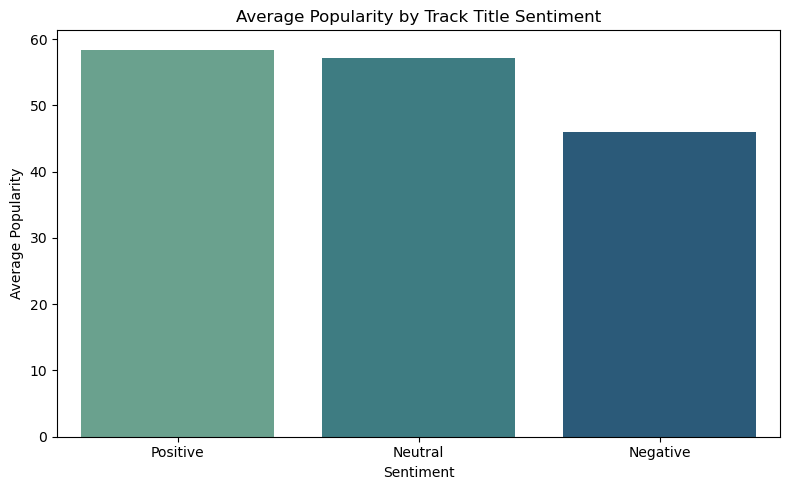

sentiment_label
Positive    58.419753
Neutral     57.157509
Negative    46.000000
Name: popularity, dtype: float64

In [195]:
# Popularity by sentiment type
popularity_by_sentiment = df.groupby('sentiment_label')['popularity'].mean().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=popularity_by_sentiment.index, y=popularity_by_sentiment.values, palette='crest')
plt.title("Average Popularity by Track Title Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Popularity")
plt.tight_layout()
plt.show()

popularity_by_sentiment


## <span style= 'color: brown;'> Sentiment trend over years</span>

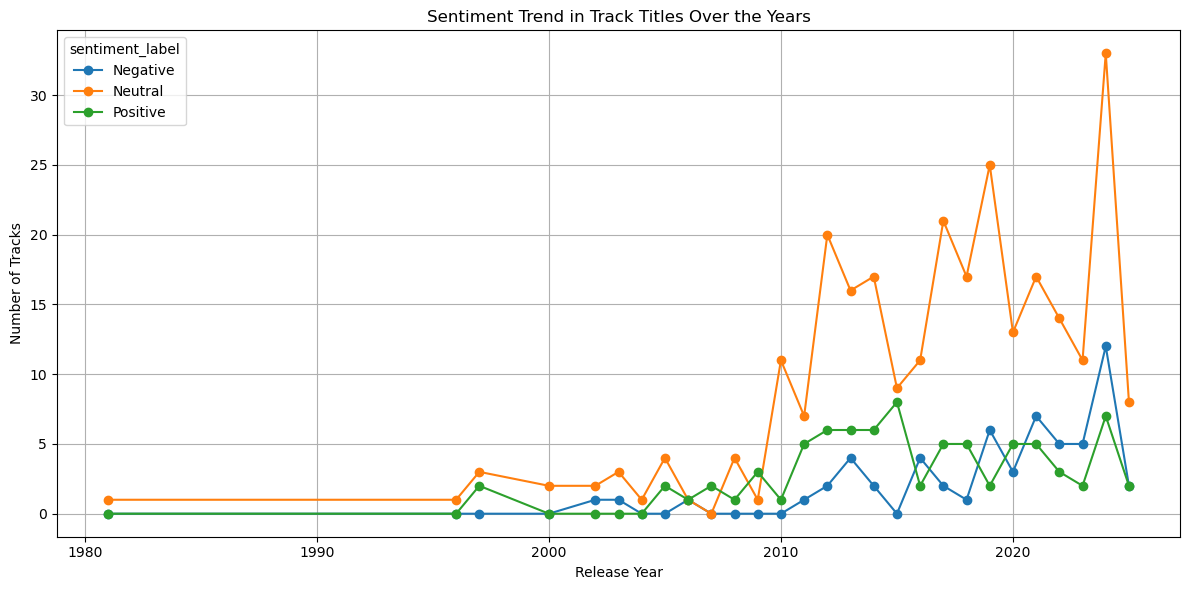

In [198]:
# Ensure release_date is datetime and extract release_year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

# Count of sentiment labels per year
sentiment_by_year = df.groupby(['release_year', 'sentiment_label']).size().unstack().fillna(0)

# Line plot to show trends
sentiment_by_year.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Sentiment Trend in Track Titles Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Tracks")
plt.grid(True)
plt.tight_layout()
plt.show()


## <span style= 'color: deeppink;'> Sentiment breakdown by artist </span>

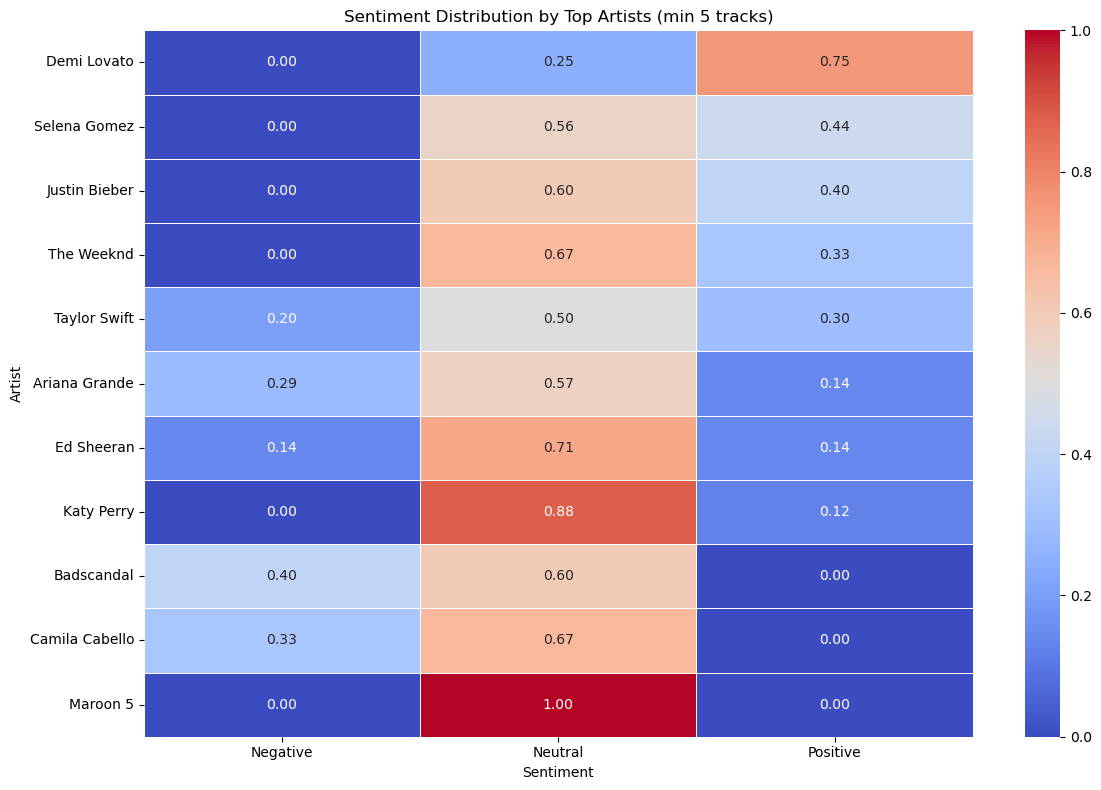

In [201]:
# Count sentiment labels per artist
artist_sentiment = df.groupby(['artist', 'sentiment_label']).size().unstack().fillna(0)

# Filter artists with at least 5 songs
artist_sentiment['total'] = artist_sentiment.sum(axis=1)
top_artists = artist_sentiment[artist_sentiment['total'] >= 5].drop(columns='total')

# Normalize to proportions
top_artists_pct = top_artists.div(top_artists.sum(axis=1), axis=0)

# Plot heatmap of sentiment proportions per artist
plt.figure(figsize=(12, 8))
sns.heatmap(top_artists_pct.sort_values(by='Positive', ascending=False).head(15),
            cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Sentiment Distribution by Top Artists (min 5 tracks)")
plt.xlabel("Sentiment")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()


## <span style='color: forestgreen;'>Word Cloud Analysis of Track Titles by Sentiment</span>


## Word list by sentiment

In [205]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter titles by sentiment
positive_titles = df[df['sentiment_label'] == 'Positive']['track_name'].dropna().str.cat(sep=' ')
negative_titles = df[df['sentiment_label'] == 'Negative']['track_name'].dropna().str.cat(sep=' ')


## Generate word cloud

In [209]:
# Generate word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_titles)
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_titles)


## Display word cloud

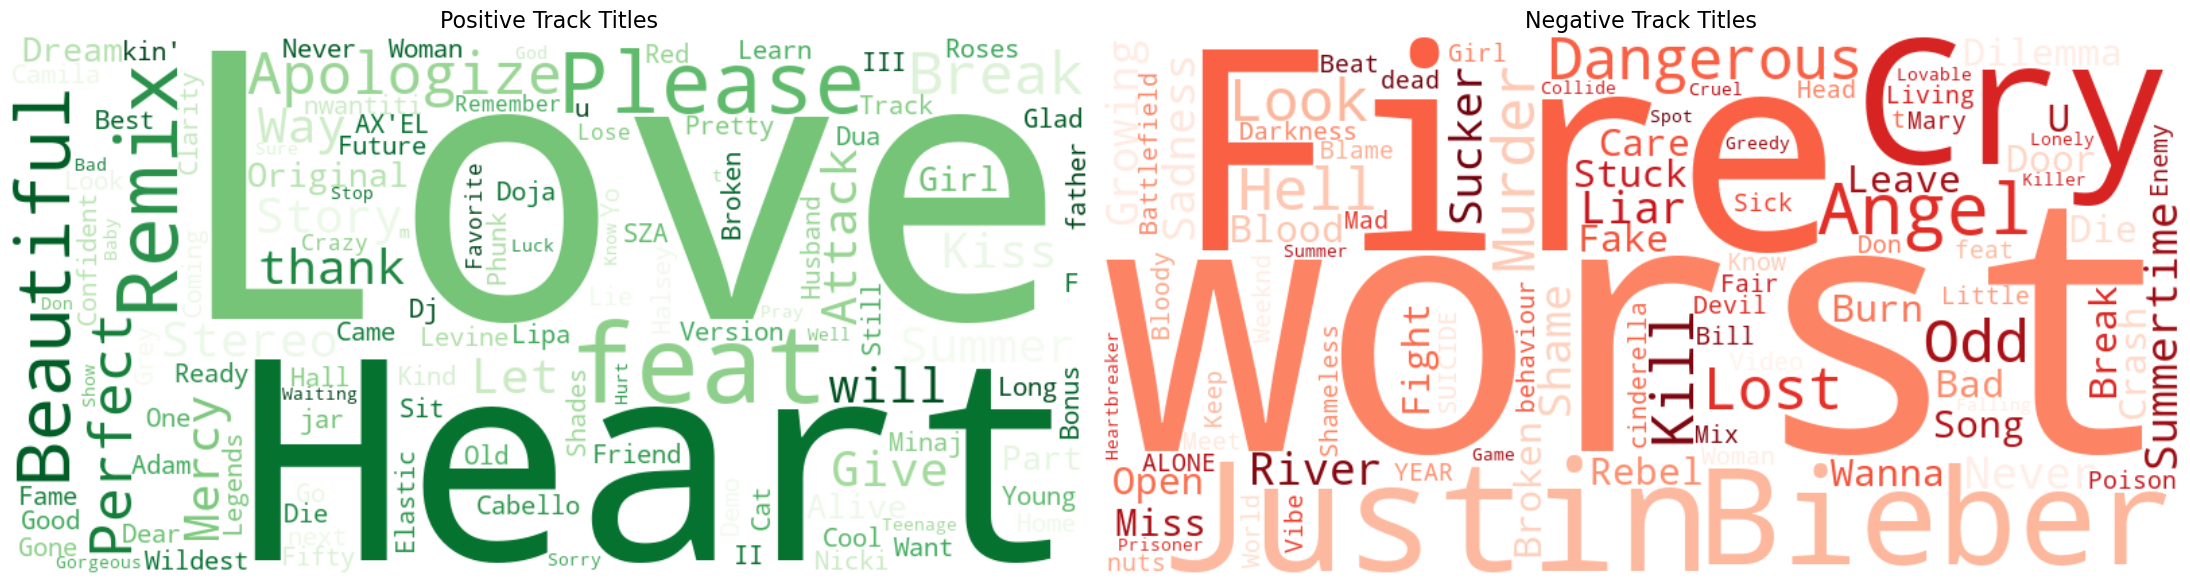

In [216]:
# Plot the word clouds
plt.figure(figsize=(22, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Track Titles", fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Track Titles", fontsize=16)

plt.tight_layout()
plt.show()
